# Section 10

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv('Data/BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [6]:
df.columns = ['ds', 'y']

In [7]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [8]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [10]:
m = Prophet()
m.fit(df)

20:38:03 - cmdstanpy - INFO - Chain [1] start processing
20:38:03 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# PLACEHOLDER TO HOLD OUR FUTURE PREDICTIONS

In [12]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [13]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [14]:
len(df)

324

In [15]:
len(future)

348

In [16]:
forecast = m.predict(future)

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1776.688550,1158.876502,1479.184919,1776.688550,1776.688550,-461.851026,-461.851026,-461.851026,-461.851026,-461.851026,-461.851026,0.0,0.0,0.0,1314.837524
1,1992-02-01,1779.325501,1186.559463,1495.302030,1779.325501,1779.325501,-427.596930,-427.596930,-427.596930,-427.596930,-427.596930,-427.596930,0.0,0.0,0.0,1351.728571
2,1992-03-01,1781.792325,1445.707933,1771.852927,1781.792325,1781.792325,-179.353792,-179.353792,-179.353792,-179.353792,-179.353792,-179.353792,0.0,0.0,0.0,1602.438533
3,1992-04-01,1784.429276,1441.759668,1738.222087,1784.429276,1784.429276,-196.121536,-196.121536,-196.121536,-196.121536,-196.121536,-196.121536,0.0,0.0,0.0,1588.307740
4,1992-05-01,1786.981164,1663.642933,1982.546617,1786.981164,1786.981164,45.427321,45.427321,45.427321,45.427321,45.427321,45.427321,0.0,0.0,0.0,1832.408485


In [18]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [19]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
343,2020-08-01,5081.583941,5392.929851,5242.648473
344,2020-09-01,4925.306025,5248.494934,5085.466258
345,2020-10-01,5040.430179,5360.327491,5190.642053
346,2020-11-01,5184.746365,5504.758941,5337.595887
347,2020-12-01,6170.569938,6499.143159,6336.691494


/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


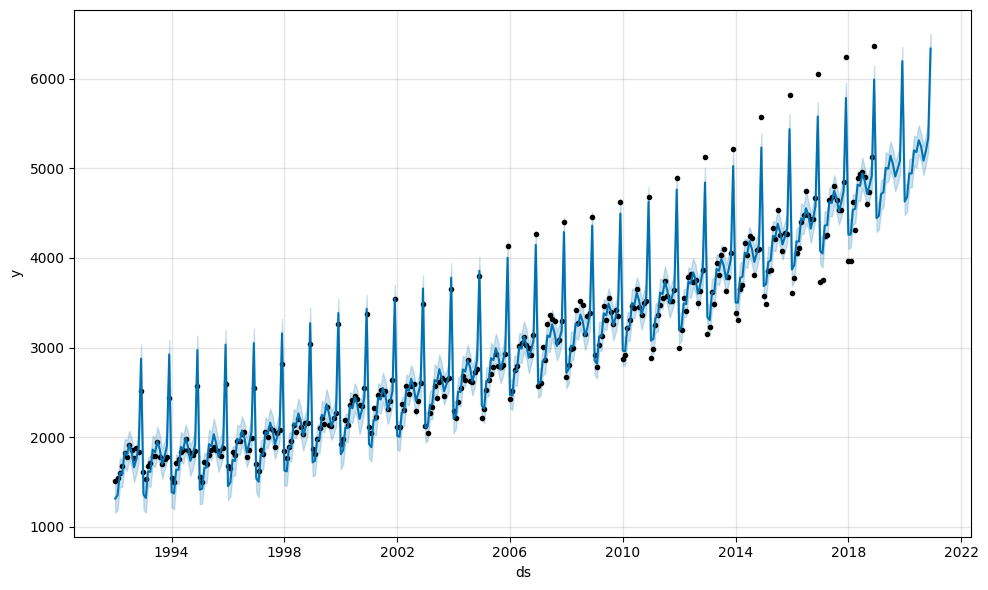

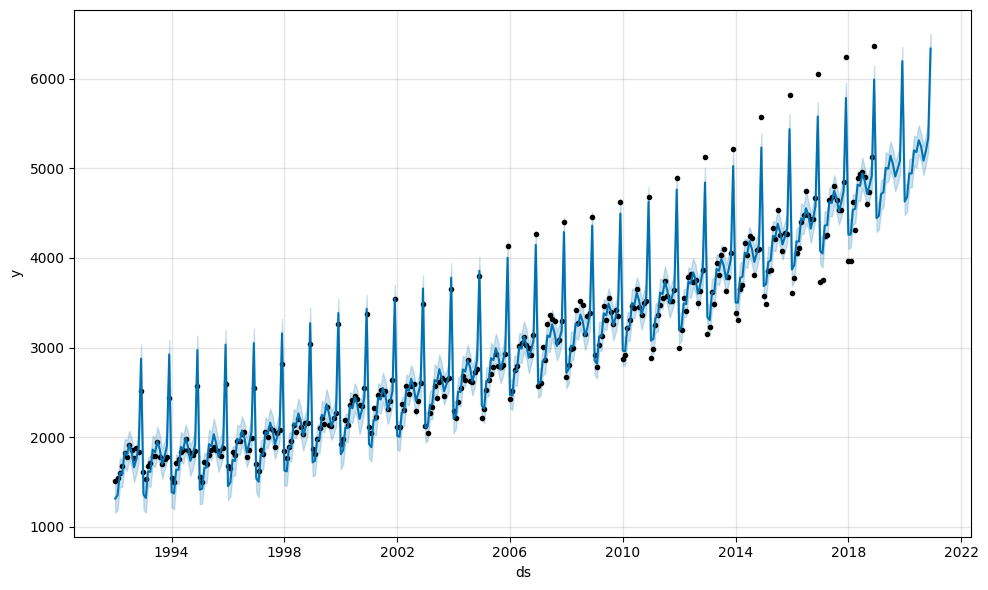

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
# plt.xlim('2014-01-01', '2021-01-01')

/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

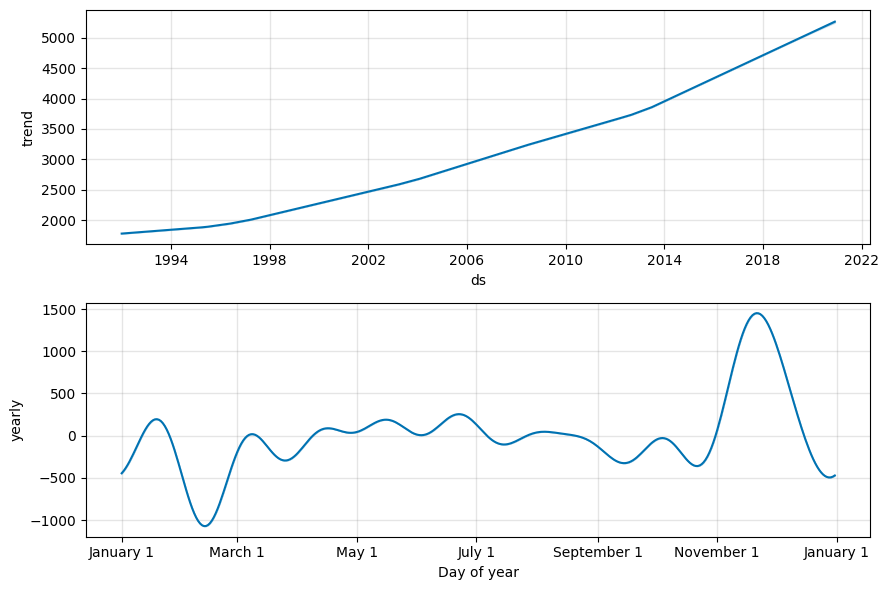

In [21]:
m.plot_components(forecast);

# Prophet 예측평가

In [22]:
df = pd.read_csv('Data/Miles_Traveled.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [24]:
df.columns = ['ds', 'y']

In [25]:
df['ds'] = pd.to_datetime(df['ds'])

In [26]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


<Axes: xlabel='ds'>

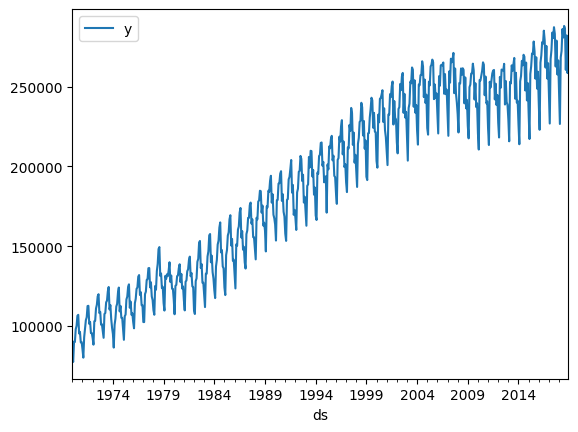

In [27]:
df.plot(x='ds', y='y')

In [28]:
len(df)

588

In [29]:
train = df.iloc[:576]
test = df.iloc[576:]

In [30]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

20:38:04 - cmdstanpy - INFO - Chain [1] start processing
20:38:04 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263251.512327,274214.126871,285616.958097,263186.875597,263315.609231,16449.461969,16449.461969,16449.461969,16449.461969,16449.461969,16449.461969,0.0,0.0,0.0,279700.974296
584,2018-09-01,263390.235562,255959.658352,267776.099099,263303.160477,263484.323411,-1667.411743,-1667.411743,-1667.411743,-1667.411743,-1667.411743,-1667.411743,0.0,0.0,0.0,261722.823819
585,2018-10-01,263524.483855,263092.541155,274716.298649,263409.725620,263652.450625,5309.266513,5309.266513,5309.266513,5309.266513,5309.266513,5309.266513,0.0,0.0,0.0,268833.750368
586,2018-11-01,263663.207090,250254.486817,261155.343894,263513.214408,263826.382068,-8205.256748,-8205.256748,-8205.256748,-8205.256748,-8205.256748,-8205.256748,0.0,0.0,0.0,255457.950343
587,2018-12-01,263797.455383,251465.807856,262547.767185,263609.869489,263985.198003,-6918.099521,-6918.099521,-6918.099521,-6918.099521,-6918.099521,-6918.099521,0.0,0.0,0.0,256879.355861


<Axes: xlabel='ds'>

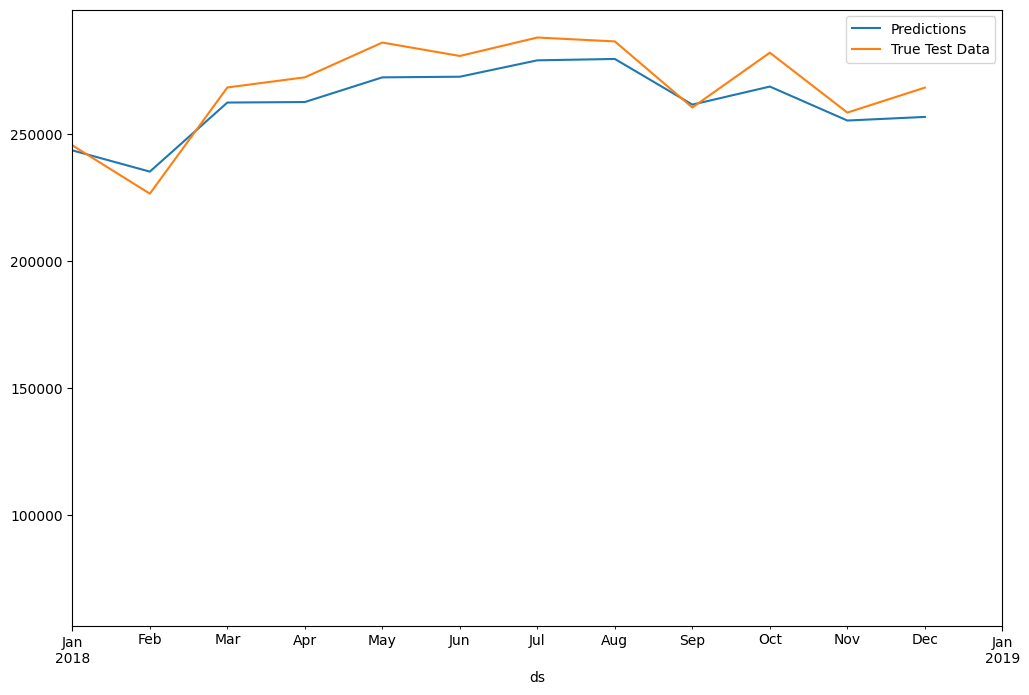

In [32]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,8))
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-01-01', '2019-01-01'))

In [33]:
from statsmodels.tools.eval_measures import rmse

In [34]:
predictions = forecast.iloc[-12:]['yhat']

In [35]:
predictions

576    243712.120206
577    235338.959421
578    262538.761027
579    262738.354740
580    272460.074159
581    272709.370569
582    279166.704802
583    279700.974296
584    261722.823819
585    268833.750368
586    255457.950343
587    256879.355861
Name: yhat, dtype: float64

In [36]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [37]:
rmse(predictions, test['y'])

8728.546089630176

In [38]:
test.mean()

ds    2018-06-16 12:00:00
y           268739.666667
dtype: object

In [39]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [40]:
# INITIAL
initial = 5 * 365
initial = str(initial) + ' days'
initial



'1825 days'

In [41]:
# PERIOD
period = 5 * 365
period = str(period) + ' days'
period


'1825 days'

In [42]:
# HORIZON
horizon = 365
horizon = str(horizon) + ' days'
horizon

'365 days'

In [43]:
df_cv = cross_validation(m, initial=initial,period=period,horizon=horizon)

  0%|          | 0/9 [00:00<?, ?it/s]

20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:05 - cmdstanpy - INFO - Chain [1] done processing
20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:05 - cmdstanpy - INFO - Chain [1] done processing
20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:05 - cmdstanpy - INFO - Chain [1] done processing
20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:05 - cmdstanpy - INFO - Chain [1] done processing
20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:05 - cmdstanpy - INFO - Chain [1] done processing
20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:05 - cmdstanpy - INFO - Chain [1] done processing
20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:05 - cmdstanpy - INFO - Chain [1] done processing
20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1] done processing
20:38:06 - cmdstanpy - INFO - Chain [1] start processing
20:38:06 - cmdstanpy - INFO - Chain [1]

In [44]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.055376,106957.548526,109944.011511,102445.0,1976-12-11
1,1977-02-01,102996.079255,101514.574861,104465.972657,102416.0,1976-12-11
2,1977-03-01,118973.286434,117566.859311,120421.765679,119960.0,1976-12-11
3,1977-04-01,120612.895423,119088.318412,122115.345632,121513.0,1976-12-11
4,1977-05-01,127882.995885,126397.954141,129226.091461,128884.0,1976-12-11


In [45]:
len(df_cv)

108

In [46]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.434692e+07,4934.259940,4532.679757,0.027732,0.023405,0.027315,0.3
1,53 days,2.181384e+07,4670.529411,4262.126477,0.024938,0.023405,0.024642,0.3
2,54 days,1.841963e+07,4291.809720,3737.267635,0.020049,0.022442,0.019891,0.4
3,55 days,2.331938e+07,4829.014175,4262.361866,0.023142,0.023405,0.022893,0.3
4,57 days,2.115307e+07,4599.246861,4001.692218,0.021436,0.022442,0.021228,0.4
...,...,...,...,...,...,...,...,...
94,360 days,1.855483e+07,4307.531480,3781.145204,0.019733,0.019590,0.019742,0.5
95,361 days,1.766459e+07,4202.926724,3504.294862,0.018350,0.018921,0.018370,0.5
96,362 days,3.193714e+07,5651.295704,4428.471081,0.022143,0.024723,0.022043,0.4
97,364 days,3.027065e+07,5501.877115,4273.653936,0.021568,0.021851,0.021481,0.5


/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


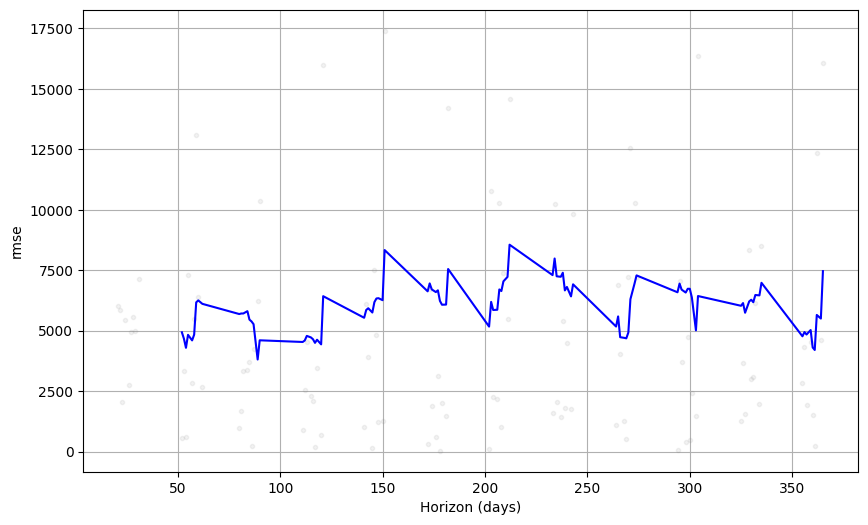

In [47]:
plot_cross_validation_metric(df_cv,metric='rmse');

# Prophet 추세

In [48]:
df = pd.read_csv('Data/HospitalityEmployees.csv')

In [50]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

<Axes: xlabel='ds'>

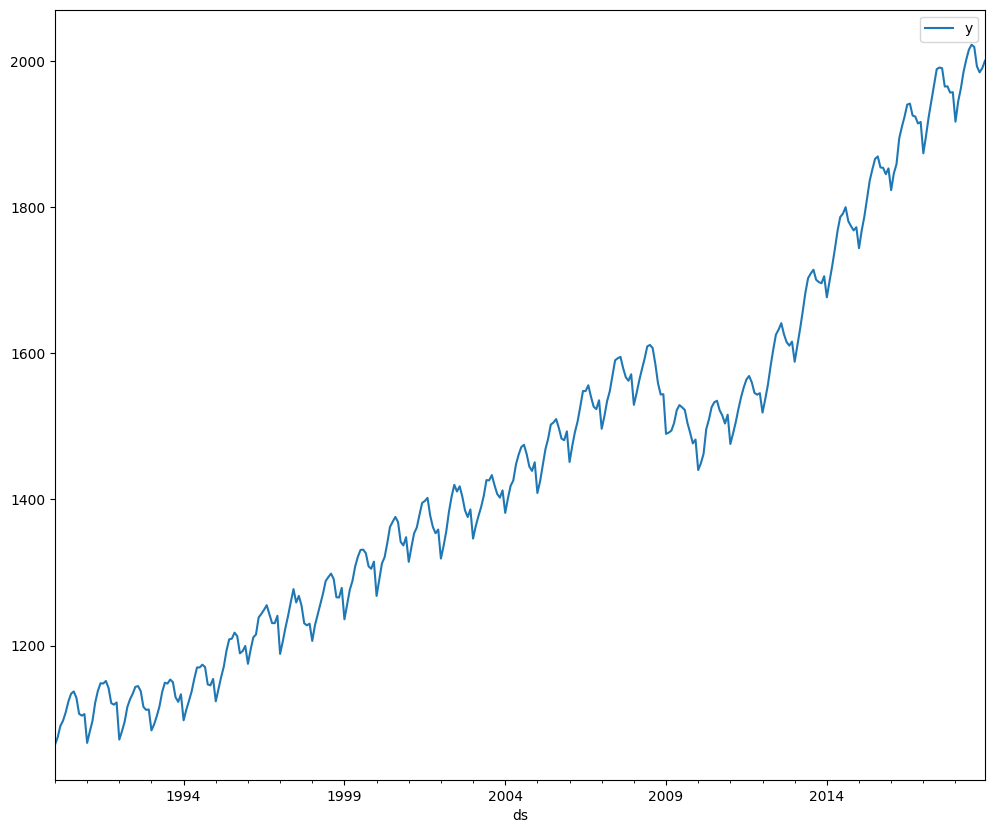

In [53]:
df.plot(x='ds', y='y', figsize=(12,10))

In [55]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

20:40:21 - cmdstanpy - INFO - Chain [1] start processing
20:40:21 - cmdstanpy - INFO - Chain [1] done processing


/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


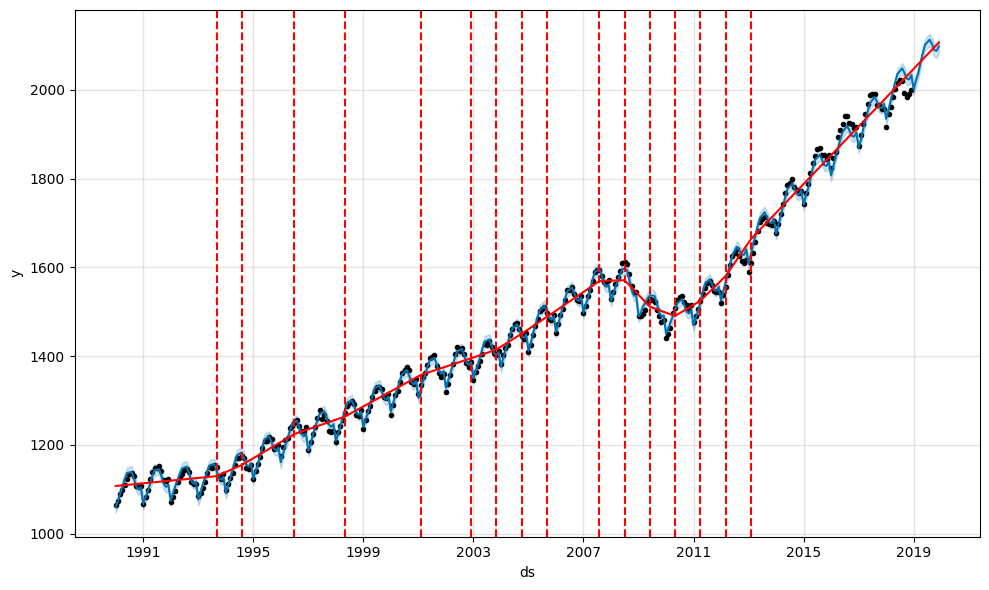

In [56]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Prophet 계절성

In [57]:
df = pd.read_csv('Data/airline_passengers.csv')

In [59]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [60]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

20:46:19 - cmdstanpy - INFO - Chain [1] start processing
20:46:19 - cmdstanpy - INFO - Chain [1] done processing
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


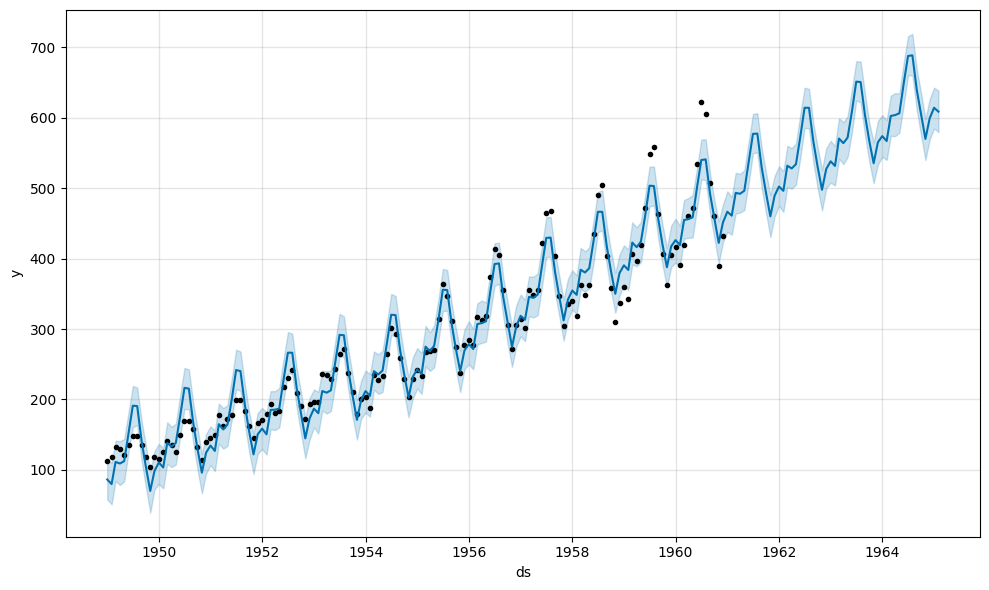

In [61]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

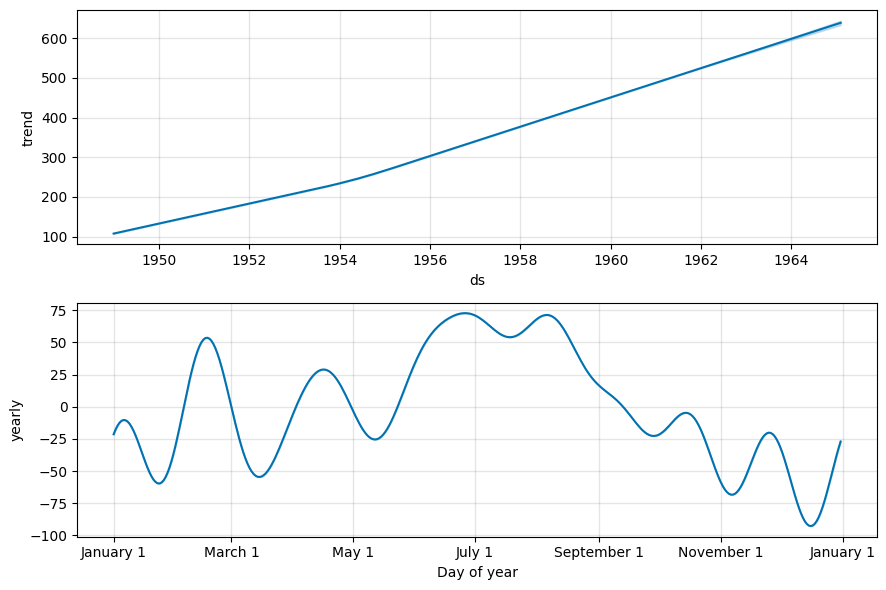

In [62]:
fig = m.plot_components(forecast)

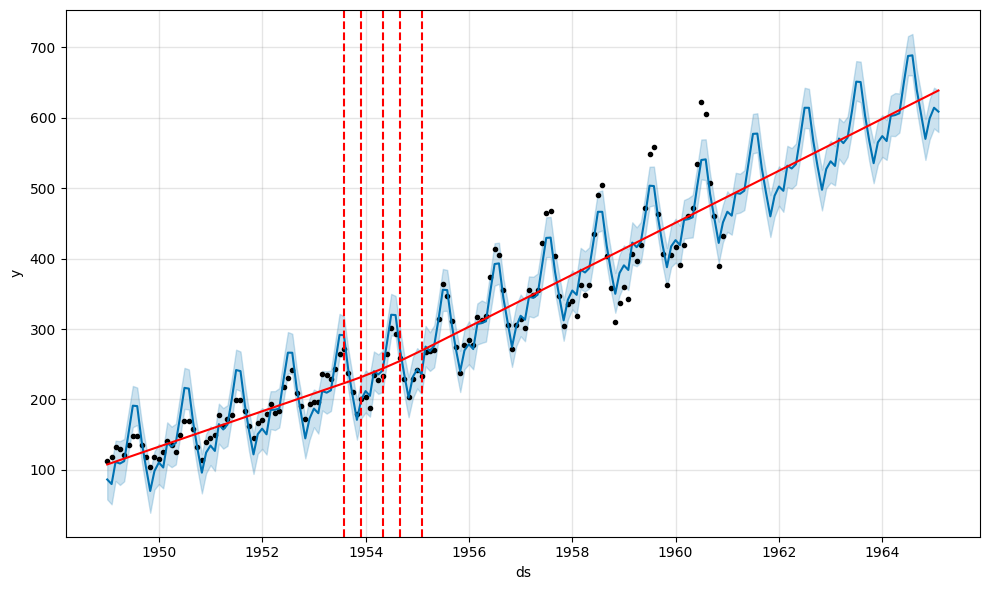

In [64]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

20:48:28 - cmdstanpy - INFO - Chain [1] start processing
20:48:28 - cmdstanpy - INFO - Chain [1] done processing
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/ms/dev/_python/series/venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


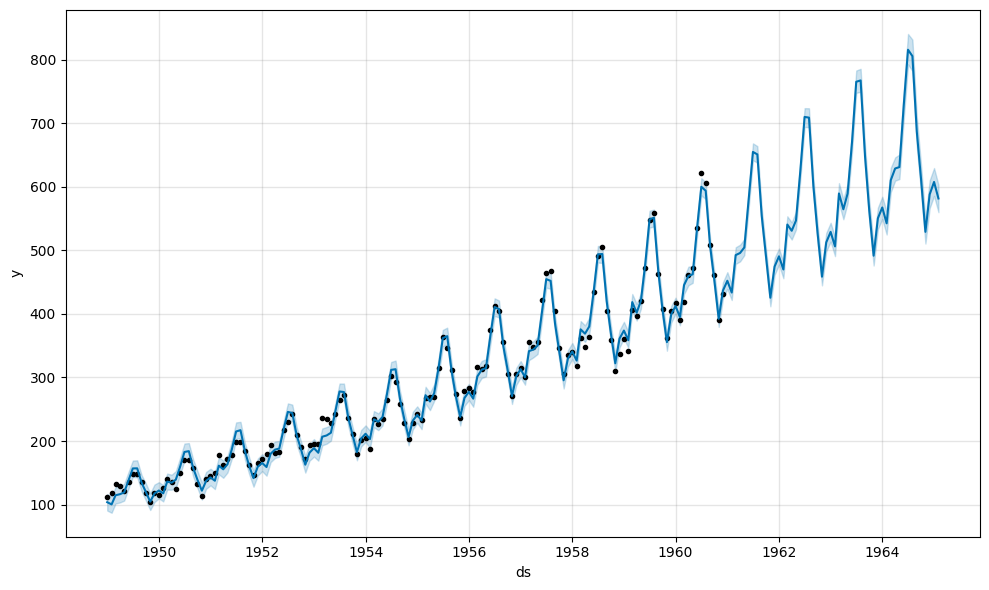

In [65]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)